In [1]:
import ImportData
# Importing the data set
X, y, Q = ImportData.loadPd_q("/Users/walfits/Repositories/trainingNN/dataSets/PBE_B3LYP/pbe_b3lyp_partQ_rel.csv")

In [2]:
import CoulombMatrix
import PartialCharge
# CM = CoulombMatrix.CoulombMatrix(matrixX=X)
# Xc = CM.getCM()

# Creating the Coulomb matrix - it has 49 features and 17751 samples
PCCM = PartialCharge.PartialCharges(X, y, Q)
Xc = PCCM.get_pccm()

In [3]:
import pandas as pd
xdf = pd.DataFrame(Xc)

In [5]:
# Demeaning the dataset
xdf_demeaned = xdf - xdf_mean
xdf_demeaned.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1.134641,0.411366,1.015461,0.497982,0.426106,-4.293000,-2.571147,0.411366,0.025852,0.068016,...,-0.657926,0.903939,1.308373,-2.571147,-0.187605,-0.862509,-0.115417,-0.434969,1.308373,-3.217944
1,0.979050,0.361474,1.086287,0.365335,0.328684,-4.326532,-2.625485,0.361474,0.029643,0.064336,...,-0.660451,0.912481,1.330396,-2.625485,-0.158260,-0.861058,-0.075271,-0.438984,1.330396,-3.225163
2,1.066895,0.397594,1.135181,0.318984,0.318162,-5.446554,-4.437856,0.397594,0.033947,0.083204,...,-0.736757,0.723305,0.668696,-4.437856,-0.388824,-0.976901,-0.706180,-0.529629,0.668696,-3.019126
3,-0.047132,0.127028,0.844038,0.269993,-3.383731,-5.188154,-4.664227,0.127028,-0.001618,0.020747,...,3.096462,-0.888992,1.617180,-4.664227,-0.561519,-0.800356,-0.755056,1.104039,1.617180,1.237417
4,-0.007953,0.133228,0.766455,0.352967,-3.384837,-5.217230,-4.671678,0.133228,-0.004924,0.008019,...,2.983941,-0.910984,1.805061,-4.671678,-0.578261,-0.816070,-0.752945,1.080359,1.805061,1.283205


In [6]:
# Calculating the covariance matrix
xdf_cov = xdf_demeaned.cov()
print xdf_cov.shape

(49, 49)


In [7]:
import numpy as np
# Calculating the eigen values and eigenvectors of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(xdf_cov)

In [8]:
# Making a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sorting the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)


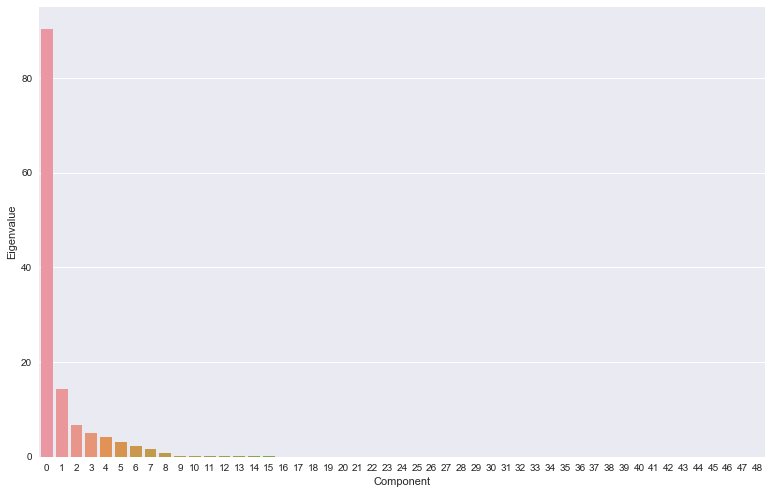

[90.450576927702926, 14.215687951670292, 6.664376714424173, 5.0145327755019897, 4.1199504160261098, 3.0753569697952647, 2.3668664670994883, 1.723572942678222, 0.72268380396201048, 0.2310986770647836, 0.21498695989029609, 0.16998801339510741, 0.14120990894627761, 0.12898440386675261, 0.091234013241372133, 0.061696066685600376, 0.044304745355746473, 0.03220875028231656, 0.0017642962641719268, 0.0016643195962887018, 0.0014562758120451377, 0.0011138926302652044, 0.00098447547714030216, 0.00090237946505587762, 0.000578541200746825, 0.00042340803830694172, 0.00038119221757228655, 1.1429527308869997e-05, 7.1445424718272038e-27, 2.9537444234980921e-28, 1.8146919970146344e-29, 6.9209927104135452e-30, 5.4281273119020864e-30, 5.4281273119020864e-30, 2.442446442009512e-30, 2.442446442009512e-30, 1.765919450116844e-30, 1.3012199477463451e-30, 1.3012199477463451e-30, 7.9916027344244615e-31, 4.9048052256437301e-31, 4.5534205523376327e-31, 3.9580181515196255e-31, 3.9580181515196255e-31, 5.402124324675

In [17]:
# Plotting the eigenvalues
import matplotlib.pyplot as plt
import seaborn as sns
y = []
for k in range(len(eig_pairs)):
    y.append(eig_pairs[k][0]) 
x = range(len(eig_pairs))

df = pd.DataFrame()
df['Eigenvalues'] = y
df['Components'] = x

fig, ax = plt.subplots(figsize=(13, 8.27))
sns.barplot(x="Components", y="Eigenvalues", data=df, ax=ax)
ax.set_ylabel('Eigenvalue')
ax.set_xlabel('Component')
# plt.savefig("PCA_prpccm.png", dpi=500)  # save as png
plt.show()
print y

In [73]:
print eig_vecs.real.T

[[  6.20234947e-02   2.52131270e-02   4.48032292e-02 ...,  -3.51334840e-02
    1.15500254e-01  -1.41722048e-01]
 [ -9.31058561e-02  -5.13067504e-02   8.66728848e-02 ...,   2.10319395e-04
   -5.14245527e-01  -1.87364140e-01]
 [ -9.04918744e-02   2.85384896e-02  -4.31065038e-01 ...,  -2.77542905e-02
   -1.04578060e-01   2.75900900e-01]
 ..., 
 [ -1.01213333e-15   1.56806745e-03   4.34556794e-02 ...,   7.83432491e-03
   -4.45677893e-04  -7.90899774e-16]
 [  1.92723609e-16  -1.75394234e-03  -1.03056056e-02 ...,  -8.36603323e-03
   -7.65682085e-03   1.43102018e-16]
 [  1.92723609e-16  -1.75394234e-03  -1.03056056e-02 ...,  -8.36603323e-03
   -7.65682085e-03   1.43102018e-16]]


In [62]:
# Comparing the eigenvectors of the covariance matrix to the PCA components from Sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=49)
pca.fit(xdf_demeaned)
pca.components_  # These are the eigenvectors of the covariance matrix. They are on the ROWS.

array([[ -6.20234947e-02,  -2.52131270e-02,  -4.48032292e-02, ...,
          3.51334840e-02,  -1.15500254e-01,   1.41722048e-01],
       [ -9.31058561e-02,  -5.13067504e-02,   8.66728848e-02, ...,
          2.10319395e-04,  -5.14245527e-01,  -1.87364140e-01],
       [ -9.04918744e-02,   2.85384896e-02,  -4.31065038e-01, ...,
         -2.77542905e-02,  -1.04578060e-01,   2.75900900e-01],
       ..., 
       [ -0.00000000e+00,  -4.12530194e-02,   7.27558743e-02, ...,
         -2.62887909e-02,   7.35354435e-02,  -6.24500451e-17],
       [ -0.00000000e+00,  -3.07237524e-02,  -8.18279019e-03, ...,
         -1.21458543e-03,   4.24441605e-03,   7.63278329e-17],
       [  0.00000000e+00,   3.52347644e-01,   2.75665360e-01, ...,
          1.28452566e-01,   3.69164786e-02,  -3.88578059e-16]])

In [79]:
transform_data_np = np.dot(xdf_demeaned, eig_vecs.real)
print transform_data.real

[[  8.20950579e+00   7.04501083e-01  -2.02228634e+00 ...,  -2.98712434e-15
    6.31983690e-16   5.34619229e-16]
 [  8.27394646e+00   7.23873485e-01  -2.09344774e+00 ...,  -2.21419558e-15
    3.07888772e-16   3.26793780e-16]
 [  1.08954959e+01   9.23002381e-01  -1.69554018e+00 ...,  -1.33150358e-15
    2.64889961e-16   1.59156062e-16]
 ..., 
 [  9.43947329e+00  -1.22223246e+00  -7.13214232e-01 ...,   2.96824958e-15
   -6.36053409e-16  -5.61183697e-16]
 [  9.52831702e+00  -1.20837797e+00  -7.82026720e-01 ...,   2.28622258e-15
   -7.50420165e-16  -4.49850349e-16]
 [  9.60491522e+00  -1.22822499e+00  -8.15945578e-01 ...,   1.75538604e-15
   -6.67652907e-16  -2.18117626e-16]]


In [77]:
# Comparing the dot product of the data with the eigenvectors of the covariance matrix and the fit_transform of Sklearn
transform_data_sklearn = pca.fit_transform(xdf_demeaned)
print transform_data_sklearn

[[ -8.20950579e+00   7.04501083e-01  -2.02228634e+00 ...,  -7.84841492e-15
   -1.67433671e-15   2.09259638e-14]
 [ -8.27394646e+00   7.23873485e-01  -2.09344774e+00 ...,  -1.18447200e-15
   -2.26787363e-15   2.71243677e-14]
 [ -1.08954959e+01   9.23002381e-01  -1.69554018e+00 ...,   5.98175900e-15
   -8.63985832e-15   2.42705061e-14]
 ..., 
 [ -9.43947329e+00  -1.22223246e+00  -7.13214232e-01 ...,  -2.02027652e-16
   -2.10835489e-16   1.57264033e-16]
 [ -9.52831702e+00  -1.20837797e+00  -7.82026720e-01 ...,  -8.08425221e-16
    5.36063540e-16   1.40971067e-16]
 [ -9.60491522e+00  -1.22822499e+00  -8.15945578e-01 ...,  -2.06477281e-16
   -3.62359158e-16   3.34127166e-16]]
